![](https://i.postimg.cc/bJ3MtNMF/Screenshot-2025-06-24-155139.png)

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">🧾 1. Import Libraries</span>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for clean visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📥 2. Load the Data</span>

In [37]:
# Load anime and ratings datasets
anime = pd.read_csv('/kaggle/input/anime-recommendations-database/anime.csv')
ratings = pd.read_csv('/kaggle/input/anime-recommendations-database/rating.csv')

# Show basic info
print("Anime dataset shape:", anime.shape)
print("Ratings dataset shape:", ratings.shape)


Anime dataset shape: (12294, 7)
Ratings dataset shape: (7813737, 3)


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📌 3. Quick Look at Data</span>

In [38]:
# Anime data preview
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [39]:
# Ratings data preview
ratings.head()


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [40]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">❓ 4. Missing Values Check</span>

In [41]:
# Anime missing values
anime.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [42]:
# Check missing in ratings
ratings.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">🔍 5. Clean & Fix Basic Issues</span>

In [43]:
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [44]:
# Fix unknown values in 'episodes'
anime['episodes'] = anime['episodes'].replace('Unknown', np.nan).astype(float)

#anime = anime.dropna()


In [45]:
print("Unique users in ratings:", ratings['user_id'].nunique())
print("Unique anime rated:", ratings['anime_id'].nunique())



Unique users in ratings: 73515
Unique anime rated: 11200


In [46]:
ratings_cleaned = ratings[ratings['rating'] != -1]
print("Original ratings:", len(ratings))
print("Cleaned ratings (removed -1):", len(ratings_cleaned))

Original ratings: 7813737
Cleaned ratings (removed -1): 6337241


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">🔍EDA</span>

<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📈 6. Anime Rating Distribution</span>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


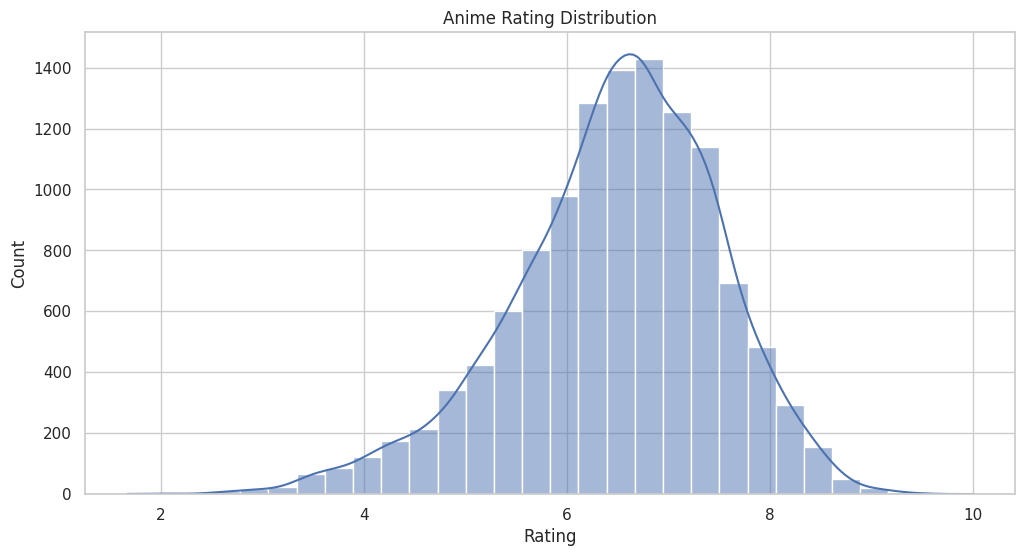

In [47]:
sns.histplot(anime['rating'].dropna(), bins=30, kde=True)
plt.title('Anime Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">🧾 7. Anime Types (TV, Movie, etc.)</span>

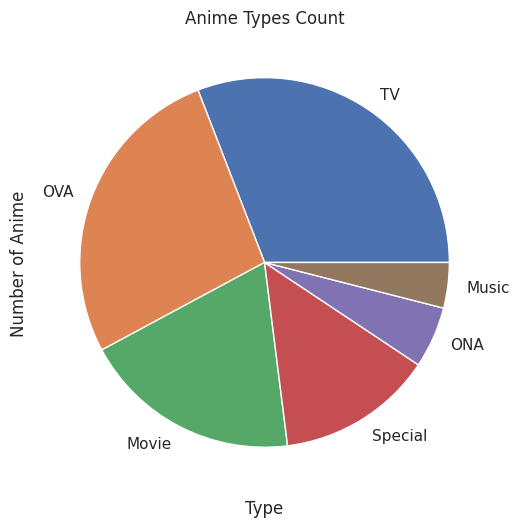

In [48]:
anime['type'].value_counts().plot(kind='pie')
plt.title('Anime Types Count')
plt.xlabel('Type')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45)
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">🎭 8. Top Genres</span>

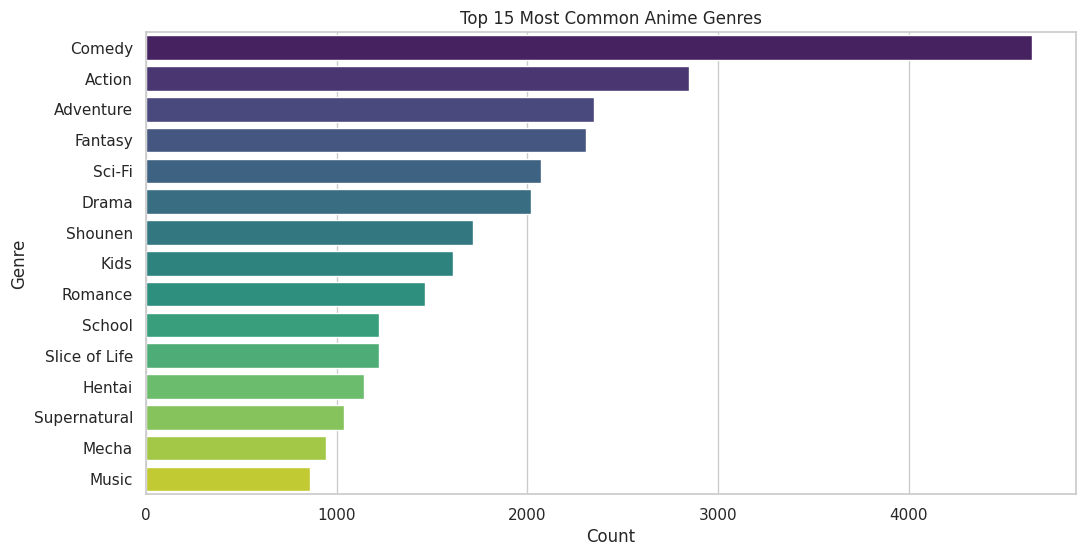

In [49]:
# Count how often each genre appears
from collections import Counter

genre_count = Counter()
for genres in anime['genre'].dropna():
    for g in genres.split(', '):
        genre_count[g] += 1

# Convert to DataFrame
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Plot
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='viridis')
plt.title('Top 15 Most Common Anime Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">✅ 9. Top 20 Anime by Members</span>

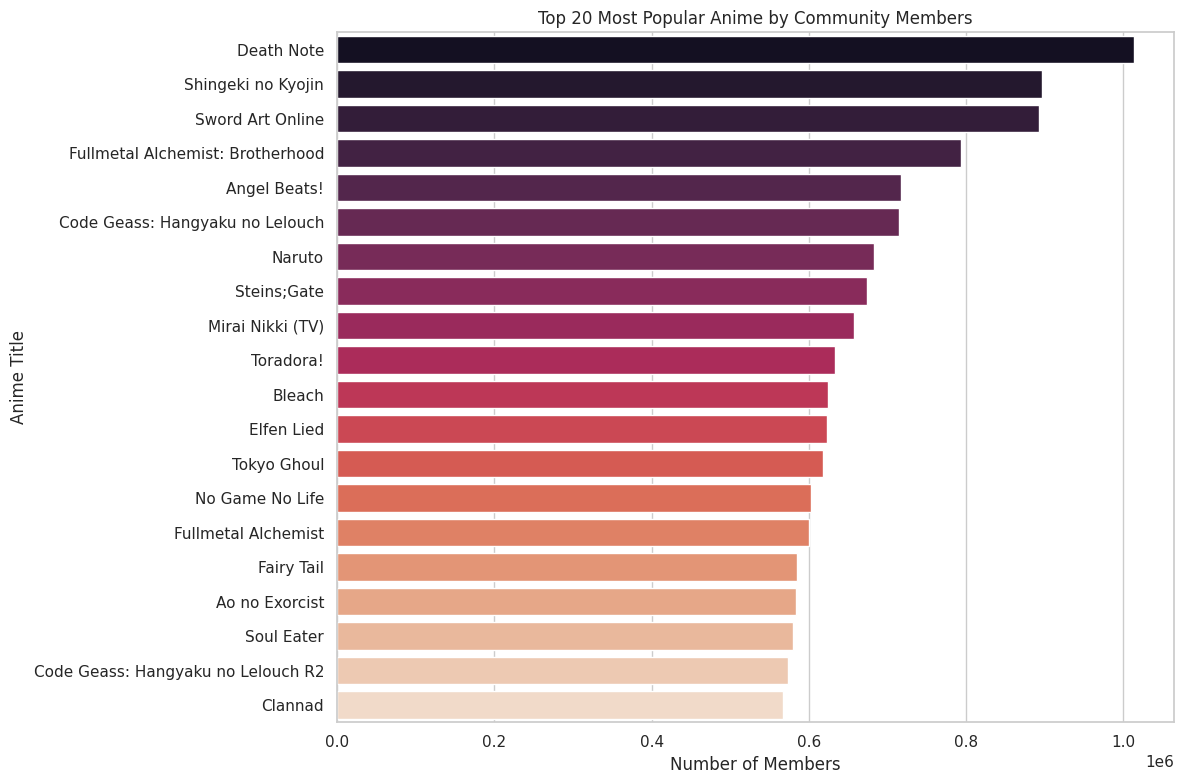

In [50]:
# Drop missing values in 'members' and sort by size
top_members = anime[['name', 'members']].dropna().sort_values(by='members', ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_members, x='members', y='name', palette='rocket')

plt.title('Top 20 Most Popular Anime by Community Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Title')
plt.tight_layout()
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📊 10. Side-by-Side: Avg Anime Rating vs Avg User Rating Distribution</span>

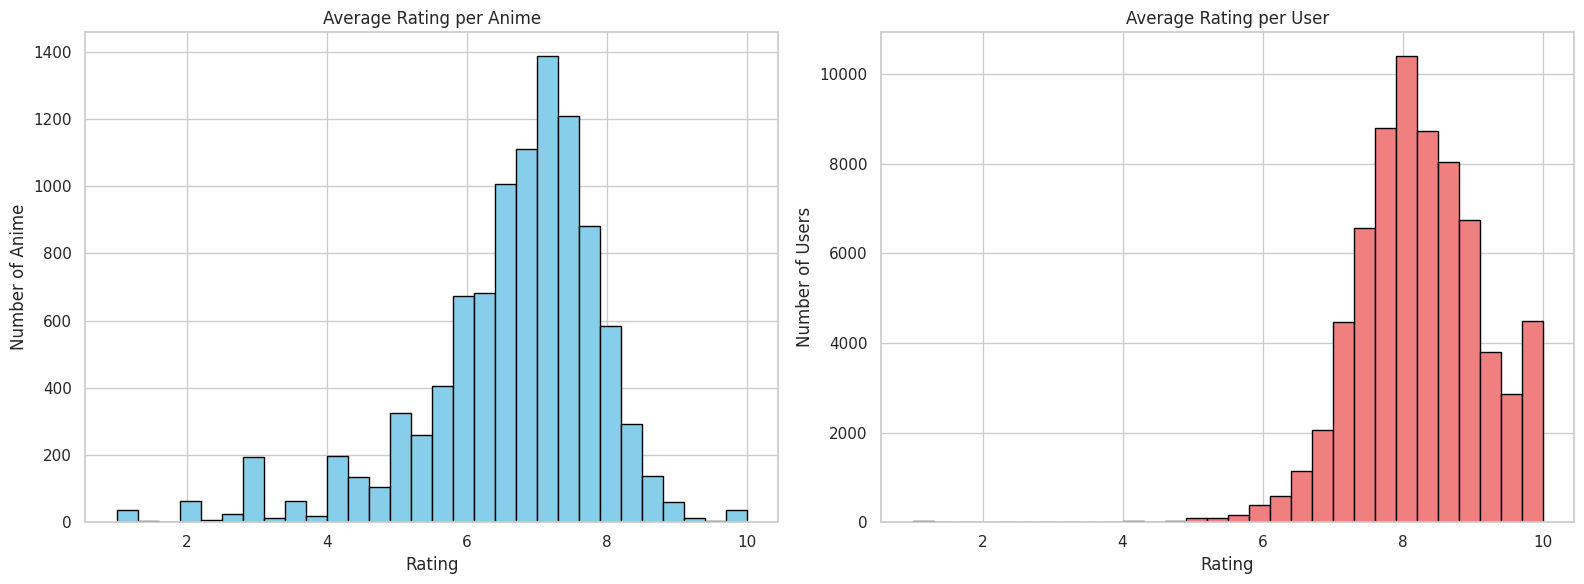

In [51]:
# Compute average rating per anime
anime_avg_ratings = ratings_cleaned.groupby('anime_id')['rating'].mean()

# Compute average rating per user
user_avg_ratings = ratings_cleaned.groupby('user_id')['rating'].mean()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Anime avg ratings
axes[0].hist(anime_avg_ratings, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Average Rating per Anime')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Anime')

# User avg ratings
axes[1].hist(user_avg_ratings, bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Average Rating per User')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">📊 11. Top Anime Based on Number of Ratings (Most Rated)</span>

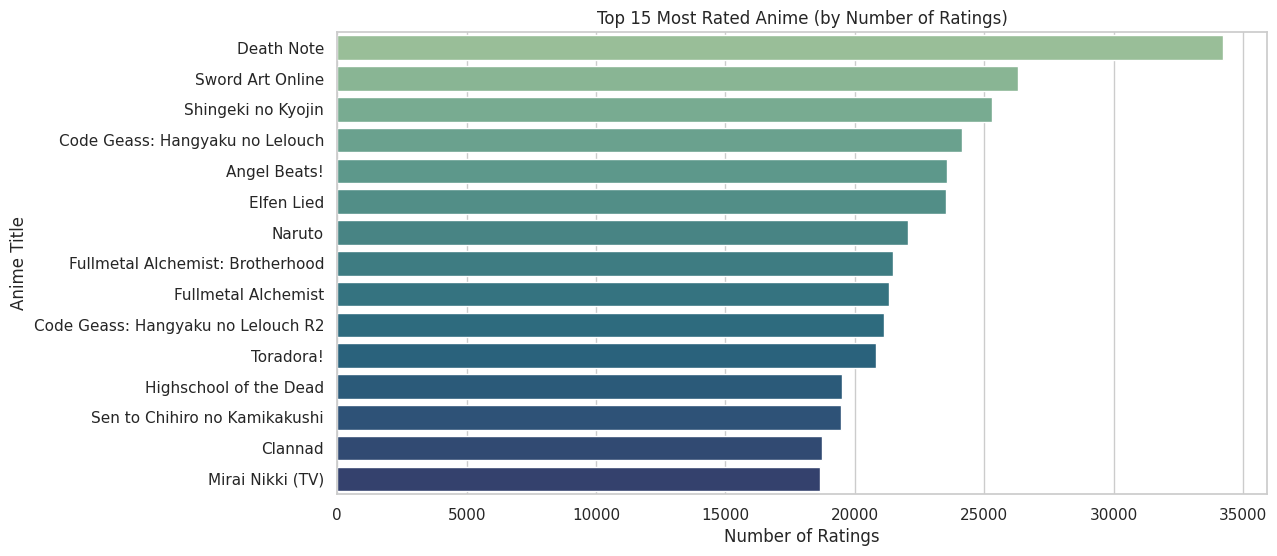

In [52]:

# Count number of ratings per anime
anime_rating_counts = ratings_cleaned['anime_id'].value_counts().reset_index()
anime_rating_counts.columns = ['anime_id', 'num_ratings']

# Merge with anime names
top_rated_anime = pd.merge(anime_rating_counts, anime[['anime_id', 'name']], on='anime_id')

# Sort and take top 15
top_rated_anime = top_rated_anime.head(15)

# Show table
top_rated_anime[['name', 'num_ratings']]

sns.barplot(data=top_rated_anime, x='num_ratings', y='name', palette='crest')
plt.title('Top 15 Most Rated Anime (by Number of Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Anime Title')
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">☁️ 12. Anime Genre Word Cloud</span>

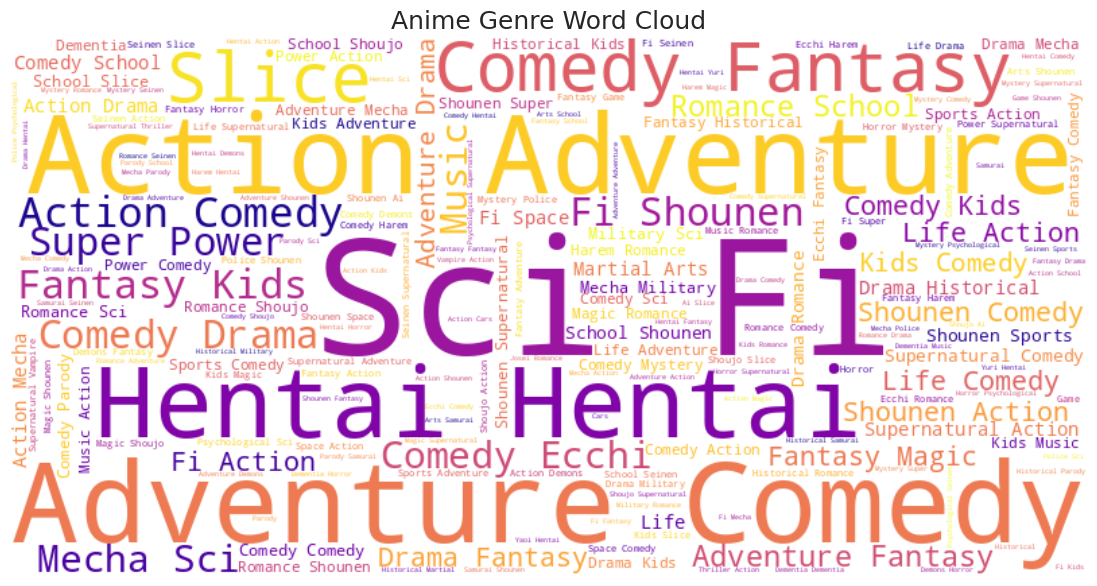

In [53]:
from wordcloud import WordCloud

# Drop missing genres
genre_data = anime['genre'].dropna()

# Combine all genres into one string
all_genres = ','.join(genre_data)

# Split and join again to ensure spaces between words
genre_words = ' '.join(all_genres.replace(',', ' ').split())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='plasma'
).generate(genre_words)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Anime Genre Word Cloud', fontsize=18)
plt.show()


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">🔹 13. Rating Distribution by Type</span>

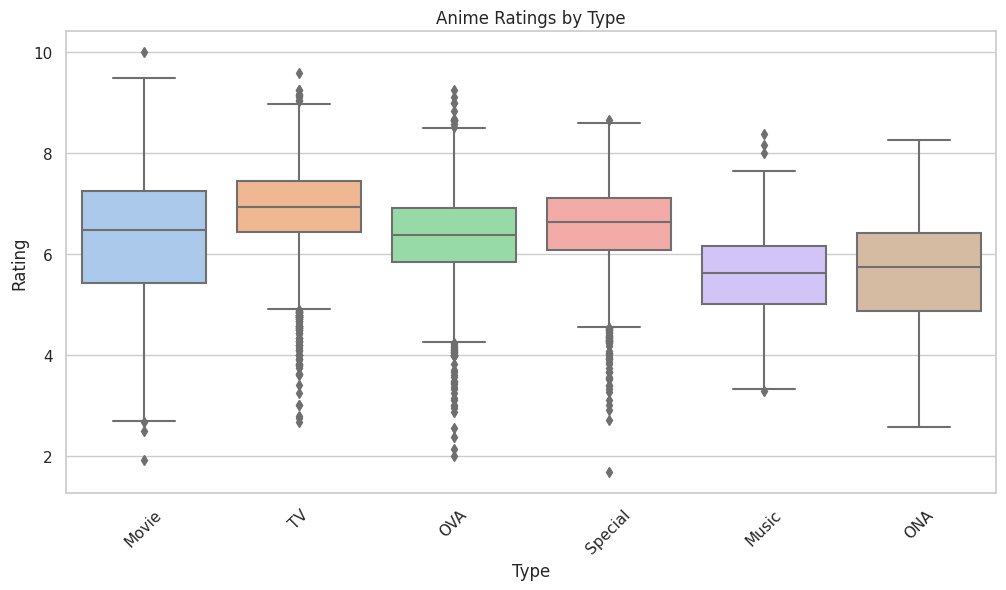

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=anime, x='type', y='rating', palette='pastel')
plt.title('Anime Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


<hr style="border: 2px solid red;">  <!-- Red Line Divider -->

<span style="color: white; background-color: red; padding: 12px 22px; border-radius: 12px; font-size: 38px; font-weight: bold;">Recommender Systems😃</span>


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;"> 1- Popularity-Based Recommender</span>

In [55]:

# Count number of ratings per anime
anime_rating_count = ratings_cleaned.groupby('anime_id')['rating'].count().reset_index()
anime_rating_count.columns = ['anime_id', 'num_ratings']

# Merge with anime titles
popularity_df = anime_rating_count.merge(anime[['anime_id', 'name']], on='anime_id')

# Top 10 most rated anime
top_popular = popularity_df.sort_values(by='num_ratings', ascending=False).head(10)

# Display
print(top_popular[['name', 'num_ratings']])


                                    name  num_ratings
1388                          Death Note        34226
6323                    Sword Art Online        26310
7059                  Shingeki no Kyojin        25290
1426     Code Geass: Hangyaku no Lelouch        24126
4567                        Angel Beats!        23565
201                           Elfen Lied        23528
10                                Naruto        22071
3936    Fullmetal Alchemist: Brotherhood        21494
99                   Fullmetal Alchemist        21332
2642  Code Geass: Hangyaku no Lelouch R2        21124


<span style="color: white; background-color: blue; padding: 10px 15px; border-radius: 8px; font-size: 28px; font-weight: bold;">2- Content-Based Recommender</span>

![](https://i.postimg.cc/brfTdXYF/Five-most-popular-similarity-measures-implementation-in-python-4-620x475.png)

> Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
# to calculate cosine similarity between two vectors efficiently
from sklearn.metrics.pairwise import linear_kernel

# Fill NaN genres with empty string
anime['genre'] = anime['genre'].fillna('')

# TF-IDF Vectorizer on genre
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime['genre'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Anime name to index mapping
anime_indices = pd.Series(anime.index, index=anime['name']).drop_duplicates()

# Recommender function
def recommend_content(title, top_n=10):
    idx = anime_indices.get(title)
    if idx is None:
        print("Anime not found!")
        return
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    anime_indices_top = [i[0] for i in sim_scores]
    return anime['name'].iloc[anime_indices_top]



In [57]:
# Example
recommend_content("One Piece")

231     One Piece: Episode of Merry - Mou Hitori no Na...
241     One Piece: Episode of Nami - Koukaishi no Nami...
896     One Piece: Episode of Sabo - 3 Kyoudai no Kizu...
352                One Piece Film: Strong World Episode 0
753     One Piece: Episode of Luffy - Hand Island no B...
941                 One Piece Movie 4: Dead End no Bouken
1171    One Piece Movie 9: Episode of Chopper Plus - F...
1576                   One Piece: Adventure of Nebulandia
1793                 One Piece Movie 5: Norowareta Seiken
1795              One Piece: Umi no Heso no Daibouken-hen
Name: name, dtype: object

<span style="color: white; background-color: red; padding: 10px 20px; border-radius: 10px; font-size: 36px; font-weight: bold;">Smash That Upvote !! Thanks ! 🚀😃</span>
